<a href="https://colab.research.google.com/github/harshitha020505/MLLab1/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("titanic_train.csv")
print(df)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
df = df.dropna()


In [ ]:
#CONSTANT FEATURES
from sklearn.model_selection import train_test_split
# [col for col in df.columns if df[col].isnull().sum()>0]
X=df.drop('Survived',axis=1)
X=pd.get_dummies(X,drop_first=True)
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
constant_features=[features for features in X_train.columns if X_train[features].std()==0]
print(len(constant_features))
X_train.drop(columns=constant_features, inplace=True)
X_test.drop(columns=constant_features, inplace=True)

76


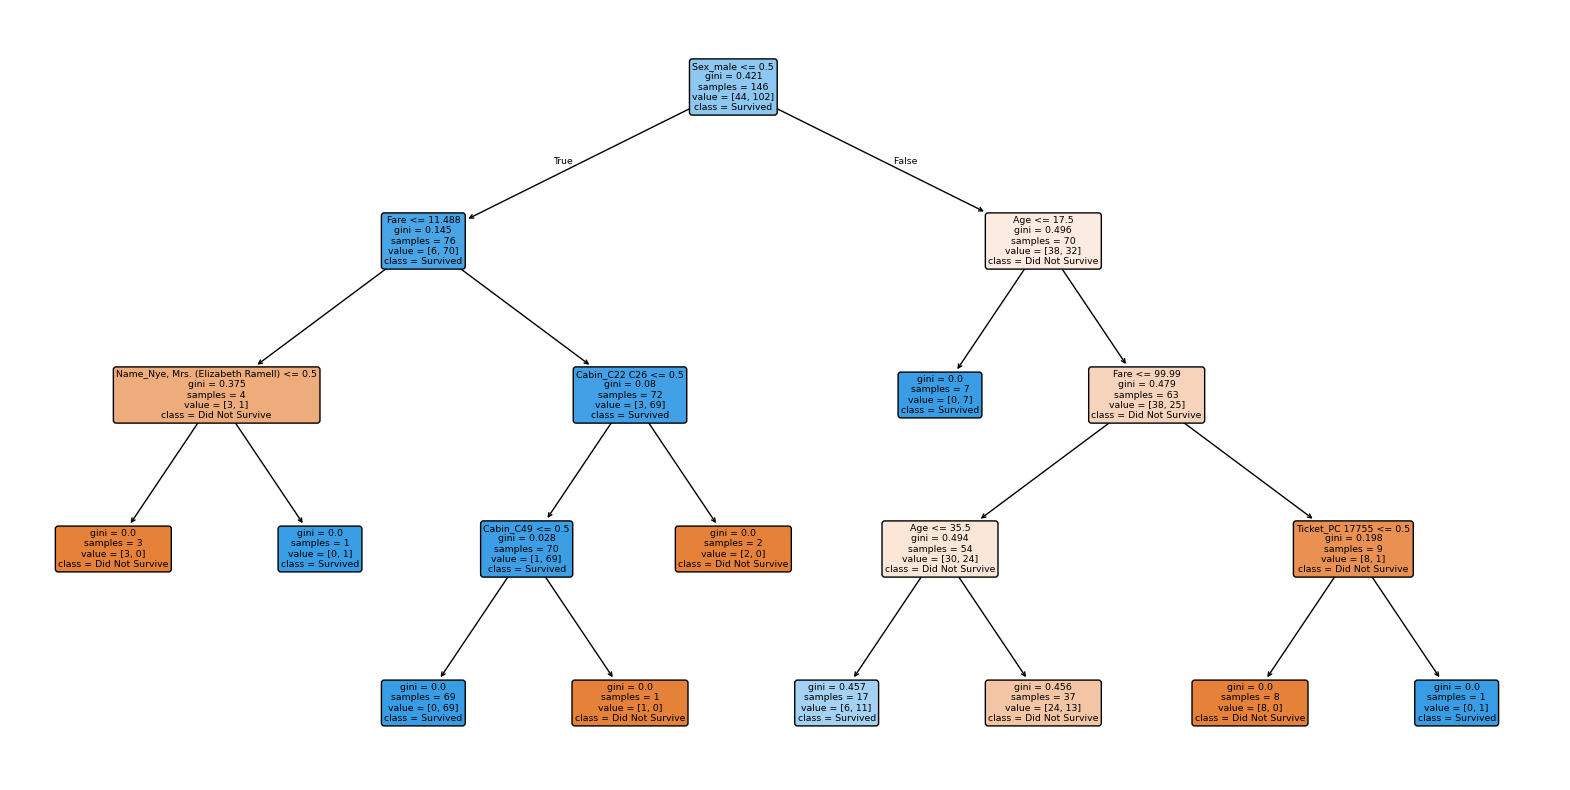

0.6756756756756757
0.6666666666666666
0.7368421052631579


In [ ]:
# Descision Tree Classifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
clf=DecisionTreeClassifier(max_depth=4,random_state=42,criterion='gini')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['Did Not Survive', 'Survived'], rounded=True)


plt.show()
print(accuracy_score(y_test,y_pred))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))


0.5675675675675675
1.0


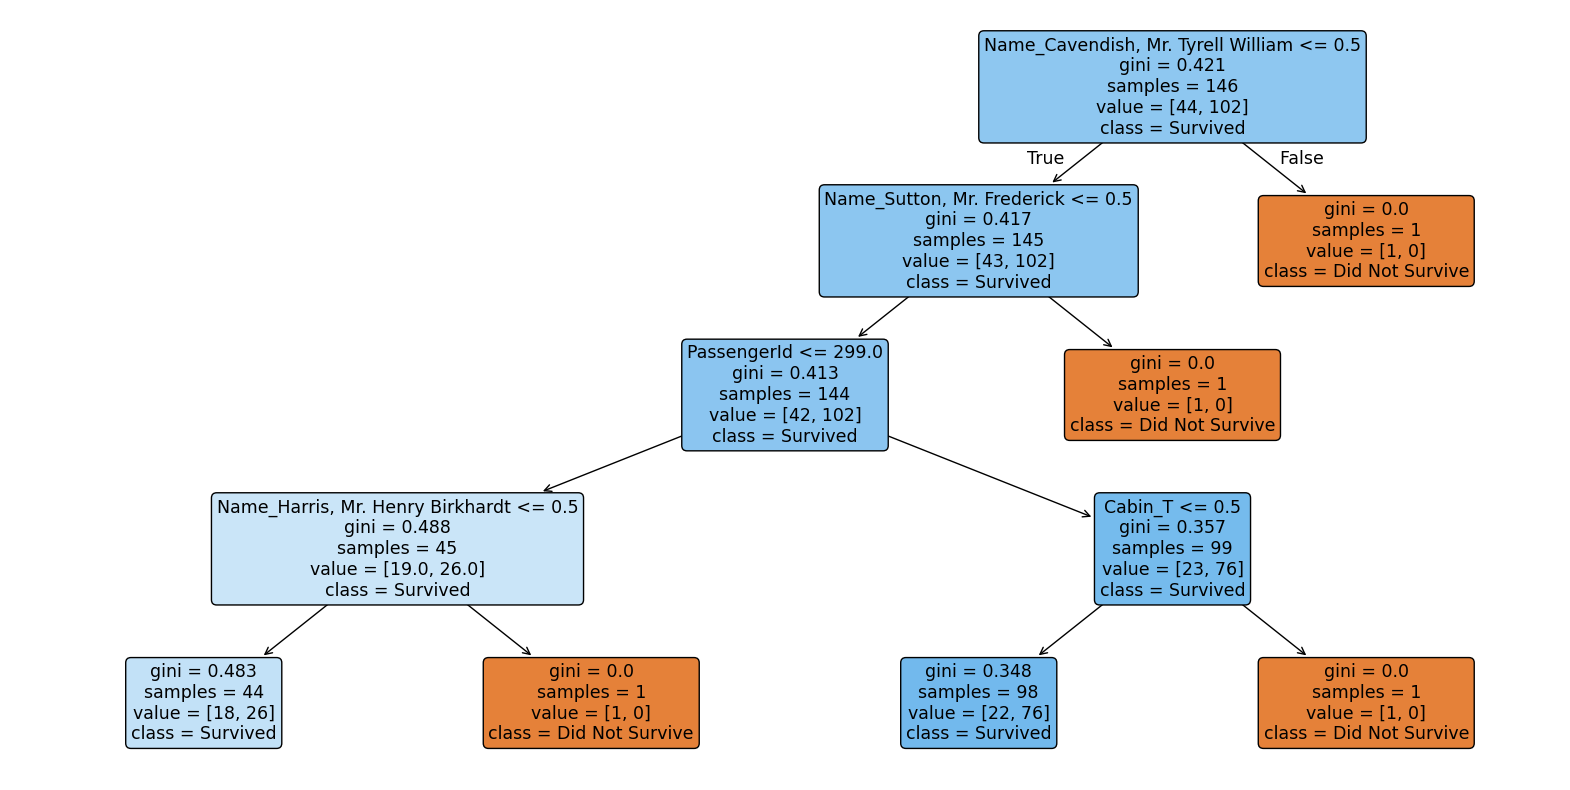

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
rf = RandomForestClassifier(n_estimators=1, max_depth=4,random_state=42,criterion='gini',bootstrap=False)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
# print(recall_score(y_pred,y_test))
plt.figure(figsize=(20,10))

plot_tree(rf.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['Did Not Survive', 'Survived'], rounded=True)


plt.show()

if n_estimators in RandomForestClassifier is 1 then it works as a descision Tree Classifier

In [ ]:
# Decision Tree
clf = DecisionTreeClassifier(max_depth=5, random_state=42, criterion='gini')
clf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print("accuracy_score",accuracy_score(y_pred,y_test))
print("prescision_score",precision_score(y_pred,y_test))
print("recall_score",recall_score(y_pred,y_test))
print("f1_score",f1_score(y_pred,y_test))

accuracy_score 0.5675675675675675
prescision_score 1.0
recall_score 0.5675675675675675
f1_score 0.7241379310344828


In [ ]:
#RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1, max_depth=5, random_state=42, criterion='gini')
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print("accuracy_score",accuracy_score(y_pred,y_test))
print("prescision_score",precision_score(y_pred,y_test))
print("recall_score",recall_score(y_pred,y_test))
print("f1_score",f1_score(y_pred,y_test))
print(rf.get_params())

accuracy_score 0.5675675675675675
prescision_score 1.0
recall_score 0.5675675675675675
f1_score 0.7241379310344828
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 1, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
# Decision Tree
clf = DecisionTreeClassifier(max_depth=5, random_state=42, criterion='gini')
clf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print("accuracy_score",accuracy_score(y_pred,y_test))
print("prescision_score",precision_score(y_pred,y_test))
print("recall_score",recall_score(y_pred,y_test))
print("f1_score",f1_score(y_pred,y_test))

accuracy_score 0.6815642458100558
prescision_score 0.0
recall_score 0.0
f1_score 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


as the number of estimators increases the accuracy is changing at 250 and 250+ iam getting same score.Random Forest is better than Descision Trees as The random forest is many descision trees it gies.



In [ ]:
#RandomForestClassifier
rf = RandomForestClassifier(n_estimators=255, max_depth=5, random_state=42, criterion='gini')
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print("accuracy_score",accuracy_score(y_pred,y_test))
print("prescision_score",precision_score(y_pred,y_test))
print("recall_score",recall_score(y_pred,y_test))
print("f1_score",f1_score(y_pred,y_test))
# print(rf.get_params())
rf = RandomForestClassifier(n_estimators=250, max_depth=5, random_state=42, criterion='gini')
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print("accuracy_score",accuracy_score(y_pred,y_test))
print("prescision_score",precision_score(y_pred,y_test))
print("recall_score",recall_score(y_pred,y_test))
print("f1_score",f1_score(y_pred,y_test))

accuracy_score 0.7039106145251397
prescision_score 0.07017543859649122
recall_score 1.0
f1_score 0.13114754098360656
accuracy_score 0.6983240223463687
prescision_score 0.05263157894736842
recall_score 1.0
f1_score 0.1


In [ ]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # drop corresponding labels
X_test = X_test.dropna()
y_test = y_test[X_test.index]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
clf1=DecisionTreeClassifier(max_depth=5,random_state=42)
clf2=LogisticRegression(max_iter=200)
clf3=KNeighborsClassifier(n_neighbors=5)
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Max Voting
import numpy as np
preds=np.vstack([y_pred1,y_pred2,y_pred3])
preds=preds.T
preds1=np.array([np.bincount(row).argmax() for row in preds])
#soft voting
proba1 = clf1.predict_proba(X_test)
proba2 = clf2.predict_proba(X_test)
proba3 = clf3.predict_proba(X_test)

avg_proba = (proba1 + proba2 + proba3) / 3
avg_voting_preds = np.argmax(avg_proba, axis=1)
#weighted
w1 = accuracy_score(y_train, clf1.predict(X_train))
w2 = accuracy_score(y_train, clf2.predict(X_train))
w3 = accuracy_score(y_train, clf3.predict(X_train))

weighted_proba = (w1*proba1 + w2*proba2 + w3*proba3) / (w1 + w2 + w3)
weighted_preds = np.argmax(weighted_proba, axis=1)


In [ ]:
print("Base Classifier Accuracies:")
print("Logistic Regression:", accuracy_score(y_test, y_pred1))
print("KNN:", accuracy_score(y_test, y_pred2))
print("Decision Tree:", accuracy_score(y_test, y_pred3))

print("\nEnsemble Accuracies:")
print("Max Voting:", accuracy_score(y_test, preds1))
print("Average Voting:", accuracy_score(y_test, avg_voting_preds))
print("Weighted Voting:", accuracy_score(y_test, weighted_preds))


Base Classifier Accuracies:
Logistic Regression: 0.8472222222222222
KNN: 0.8611111111111112
Decision Tree: 0.6388888888888888

Ensemble Accuracies:
Max Voting: 0.8333333333333334
Average Voting: 0.8680555555555556
Weighted Voting: 0.8680555555555556


In [ ]:
#Hard Voting
from sklearn.ensemble import VotingClassifier
hard_voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('knn', clf2), ('dt', clf3)],
    voting='hard'
)

hard_voting_clf.fit(X_train, y_train)
y_pred_hard = hard_voting_clf.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
soft_voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('knn', clf2), ('dt', clf3)],
    voting='soft'
)

soft_voting_clf.fit(X_train, y_train)
y_pred_soft = soft_voting_clf.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Accuracy of Hard Voting Classifier:", accuracy_score(y_test, y_pred_hard))
print("Accuracy of Soft Voting Classifier:", accuracy_score(y_test, y_pred_soft))


Accuracy of Hard Voting Classifier: 0.8333333333333334
Accuracy of Soft Voting Classifier: 0.8680555555555556


In [ ]:
# Initialize Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=None,        # maximum depth of each tree
    random_state=42
)

# Fit model
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8402777777777778


In [ ]:
# Initialize Random Forest Regressor with OOB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
rf_reg = RandomForestRegressor(
    n_estimators=100,
    oob_score=True,     # Enable OOB evaluation
    random_state=42
)

rf_reg.fit(X_train, y_train)

# Predict on test set
y_pred = rf_reg.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
oob_score = rf_reg.oob_score_

print("Test MSE:", mse)
print("Test R2:", r2)
print("OOB Score:", oob_score)


Test MSE: 0.10717222222222222
Test R2: 0.5314519924098672
OOB Score: 0.40712480062843126


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

# Boosting algorithms
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
import xgboost as xgb
from catboost import CatBoostClassifier, CatBoostRegressor

ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))


AdaBoost Accuracy: 0.8472222222222222


In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gbc))


Gradient Boosting Accuracy: 0.8263888888888888


In [ ]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:07:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8611111111111112


In [ ]:
cat_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0)
cat_clf.fit(X_train, y_train)
y_pred_cat = cat_clf.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))


CatBoost Accuracy: 0.8541666666666666


7. Among all the Boosting Algorithms XGB Classifier i got more Accuracy because it is an extreme level of Boosting and it uses Regularization,Tree Pruning and all

Bagging Accuracy: 0.8667
Random Forest Accuracy: 0.8467
AdaBoost Accuracy: 0.8267
Gradient Boosting Accuracy: 0.8800


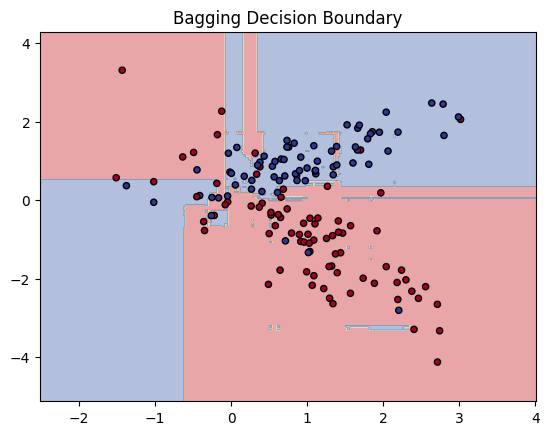

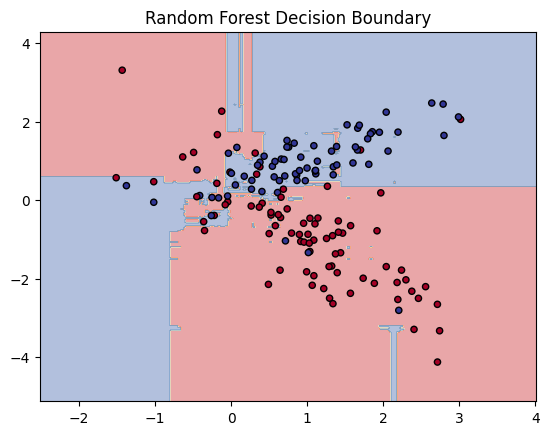

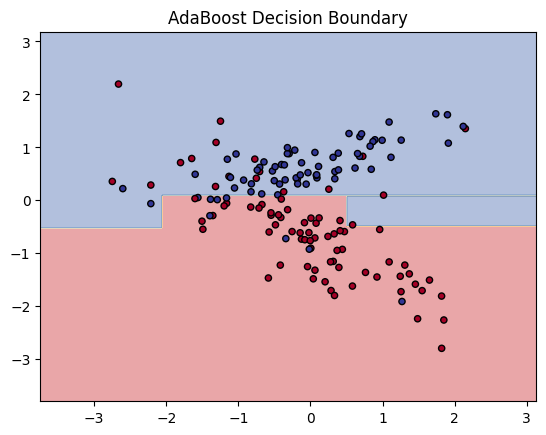

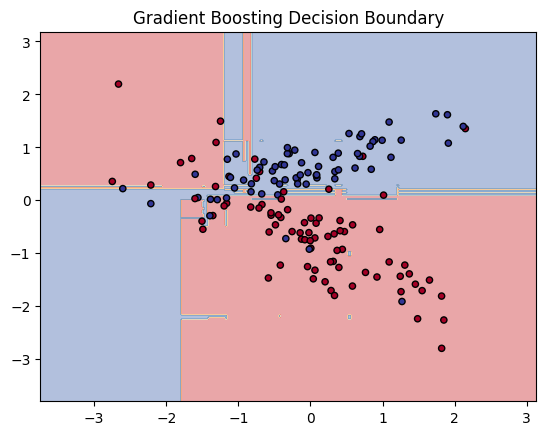

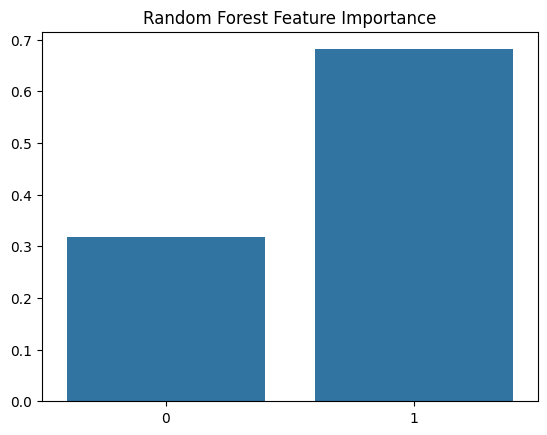

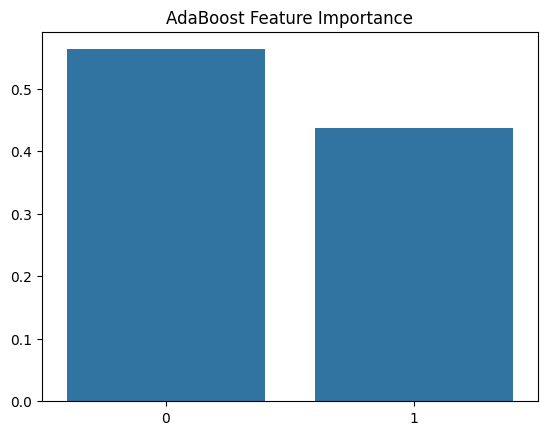

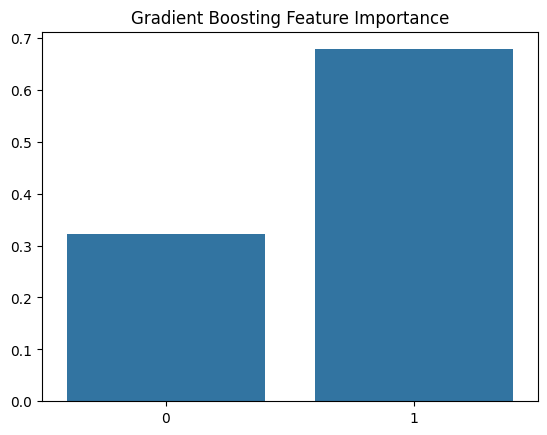

In [ ]:
# ===============================
# Ensemble Models Visualization
# ===============================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# -------------------------------
# Step 1: Create dataset
# -------------------------------
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, flip_y=0.1, random_state=42)

# Add feature noise
X += np.random.normal(0, 0.3, X.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (needed for AdaBoost and Gradient Boosting sometimes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "Bagging": BaggingClassifier(n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42)
}
results = {}
for name, model in models.items():
    if name in ["AdaBoost", "Gradient Boosting"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = {"model": model, "accuracy": acc}
    print(f"{name} Accuracy: {acc:.4f}")

# -------------------------------
# Step 4: Plot Decision Boundaries
# -------------------------------
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.show()

for name, res in results.items():
    model = res["model"]
    if name in ["AdaBoost", "Gradient Boosting"]:
        plot_decision_boundary(model, X_test_scaled, y_test, f"{name} Decision Boundary")
    else:
        plot_decision_boundary(model, X_test, y_test, f"{name} Decision Boundary")

# -------------------------------
# Step 5: Feature Importance
# -------------------------------
for name, res in results.items():
    model = res["model"]
    if hasattr(model, "feature_importances_"):
        fi = model.feature_importances_
        sns.barplot(x=[0,1], y=fi)
        plt.title(f"{name} Feature Importance")
        plt.show()


/tmp/ipython-input-2642767198.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2642767198.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

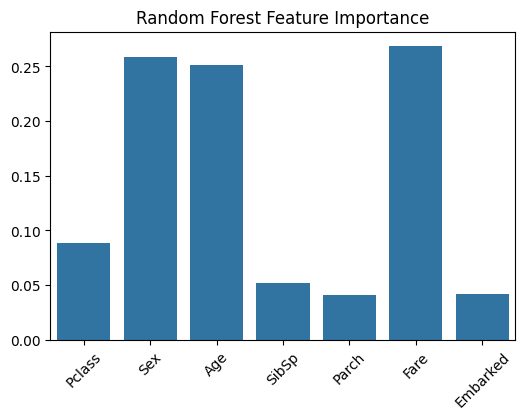

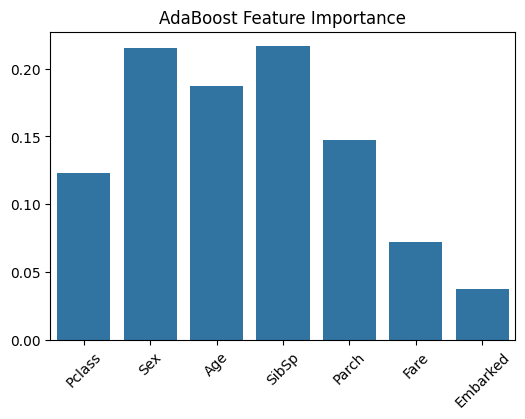

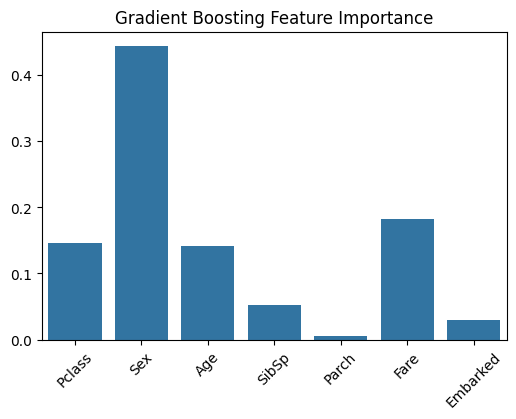


===== Homogeneous Ensemble Comparison =====
               Model  Accuracy  Training Time (s)
2           AdaBoost  0.809701           0.134194
3  Gradient Boosting  0.805970           0.170504
1      Random Forest  0.783582           0.131478
0            Bagging  0.764925           0.228026


In [ ]:
# ===============================
# Homogeneous Ensemble Comparative Study
# ===============================

import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Load and prepare dataset
# -------------------------------
df = pd.read_csv("titanic_train.csv")

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical features
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features for boosting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Step 2: Initialize homogeneous ensembles
# -------------------------------
models = {
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# -------------------------------
# Step 3: Train, predict, evaluate
# -------------------------------
results = []

for name, model in models.items():
    start_time = time.time()

    # Scale for boosting
    if name in ["AdaBoost", "Gradient Boosting"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    end_time = time.time()
    acc = accuracy_score(y_test, y_pred)
    training_time = end_time - start_time
    results.append((name, acc, training_time))

    # Feature importance (if available)
    if hasattr(model, "feature_importances_"):
        fi = model.feature_importances_
        plt.figure(figsize=(6,4))
        sns.barplot(x=features, y=fi)
        plt.title(f"{name} Feature Importance")
        plt.xticks(rotation=45)
        plt.show()

# -------------------------------
# Step 4: Display comparative results
# -------------------------------
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Training Time (s)"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print("\n===== Homogeneous Ensemble Comparison =====")
print(results_df)


10. with Heterogeneous models iam getting more accuracy than Homogeneous models
